<a href="https://colab.research.google.com/github/gitrekm/Regression-Models-scikit-learn/blob/master/scikit_learn_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Usage of Sickit-learn Regression Models for stock Market Prediction
##1- Linear Regression
##2- Ridge
##3- Lasso

Data Imported from Yahoo Finance 


In [0]:
# importing libs
import numpy as np
import pandas as pd
from google.colab import files
import math
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from matplotlib import pyplot as plt
seed=7


In [3]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AAPL.csv to AAPL.csv
User uploaded file "AAPL.csv" with length 93855 bytes


In [4]:
df = pd.read_csv('AAPL.csv', delimiter=',')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-02,103.059998,103.739998,102.720001,103.300003,94.787781,53564000
1,2014-09-03,103.099998,103.199997,98.580002,98.940002,90.787048,125421000
2,2014-09-04,98.849998,100.089996,97.790001,98.120003,90.034622,85718000
3,2014-09-05,98.800003,99.389999,98.309998,98.970001,90.814583,58457000
4,2014-09-08,99.300003,99.309998,98.050003,98.360001,90.254837,46356700


In [0]:
#generating additional feature High Low Percentage and Percentage Change.
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [6]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
0,94.787781,53564000,0.987412,0.232879
1,90.787048,125421000,4.669492,-4.034914
2,90.034622,85718000,2.344063,-0.738488
3,90.814583,58457000,1.091241,0.172063
4,90.254837,46356700,1.281003,-0.946628


In [0]:
#Preprocessing 
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)



# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col]
X = np.array(dfreg.drop(['label'], 1))

# Scaling the X to have the same distribution for linear regression
X = preprocessing.scale(X)

# Separate label and identify it as y
y = np.array(dfreg['label'])


In [0]:
## split to X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = seed)

#1- Linear Regression Implementation

In [11]:
# Linear regression

lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)

# Calculate MSE and score
y_pred=lr.predict(X_test)
mse_lr = np.mean((y_pred - y_test) ** 2)
score_lr = lr.score(X_test, y_test)

print('mse Linear Regression',mse_lr)
print('score linear regression: ', score_lr)



mse 6.675516282403584e-28
score linear regression:  1.0


In [12]:
dffinal_LinearRegresion = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dffinal_LinearRegresion.head()


,Actual,Predicted
0,114.957703,114.957703
1,138.261185,138.261185
2,184.362503,184.362503
3,91.652954,91.652954
4,155.871613,155.871613


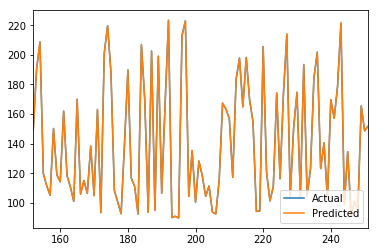

In [18]:
#Plot Predicted vs Actual

dffinal_LinearRegresion['Actual'].tail(100).plot()
dffinal_LinearRegresion['Predicted'].tail(100).plot()
plt.legend(loc=4)
plt.show()


#2- Ridge Implementation

In [15]:
###Ridge Implementation

from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

#calculating mse

mse_ridge = np.mean((pred - y_test)**2)

print('mse Ridge',mse_ridge)
## calculating score 
print('score Ridge',ridgeReg.score(X_test,y_test))

mse 4.027603199987606
score 0.9973029188817858


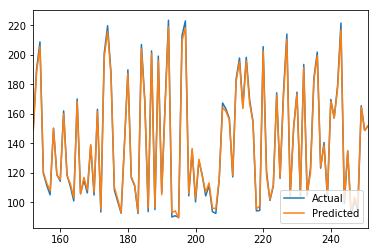

In [19]:
dfridge = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})

dfridge['Actual'].tail(100).plot()
dfridge['Predicted'].tail(100).plot()
plt.legend(loc=4)
plt.show()

#3- Lasso Implementation

In [22]:
###Lasso
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_train,y_train)

predLasso = lassoReg.predict(X_test)

# calculating mse

mse_lasso = np.mean((predLasso - y_test)**2)

print('mse Lasso',mse_lasso)

## calculating score

print('score Lasso ',lassoReg.score(X_test,y_test))



mse 88.3565415945472
score 0.9408321157342208


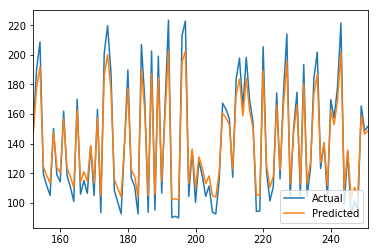

In [23]:
dfLasso = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predLasso.flatten()})

dfLasso['Actual'].tail(100).plot()
dfLasso['Predicted'].tail(100).plot()
plt.legend(loc=4)
plt.show()

As shown above :

- Linear Regression is the Most Accurate

- Lasso is the less accurate one 

